In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from typing import *

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 150)
pd.set_option('display.max_colwidth', None)
pd.set_option('future.no_silent_downcasting', True)
sns.set()

df = pd.read_csv('data_part_2.csv')

print(df.shape)
df.head()

(1009, 18)


,user_id,region,device,channel,session_start,session_end,sessiondurationsec,session_date,month,day,hour_of_day,order_dt,revenue,payment_type,promo_code,final_price,time_of_day,sold
0,529697267522,United States,iPhone,социальные сети,2019-05-01 00:06:40,2019-05-01 00:07:06,26.0,2019-05-01,5,3,0,2019-05-01 00:06:40,9999.0,Mobile payments,0.0,9999.0,night,1
1,601292388085,United States,PC,organic,2019-05-01 06:56:16,2019-05-01 07:09:18,782.0,2019-05-01,5,3,7,NaN,NaN,NaN,NaN,NaN,morning,0
2,852898876338,United States,Mac,социальные сети,2019-05-01 04:30:45,2019-05-01 04:34:56,251.0,2019-05-01,5,3,4,NaN,NaN,NaN,NaN,NaN,night,0
3,998513020664,United States,iPhone,социальные сети,2019-05-01 18:53:42,2019-05-01 18:57:35,233.0,2019-05-01,5,3,18,NaN,NaN,NaN,NaN,NaN,evening,0
4,240702200943,United States,Mac,социальные сети,2019-05-02 14:04:32,2019-05-02 14:09:51,319.0,2019-05-02,5,4,14,NaN,NaN,NaN,NaN,NaN,day,0


# Set Proper Data Types

In [2]:
dtype_mapping = {
    'user_id': 'int64', 
    'region': 'object', 
    'device': 'object', 
    'channel': 'object', 
    'session_start': 'datetime64[ns]', 
    'session_end': 'datetime64[ns]', 
    'sessiondurationsec': 'float64', 
    'session_date': 'datetime64[ns]', 
    'month': 'int64', 
    'day': 'int64', 
    'hour_of_day': 'int64', 
    'order_dt': 'datetime64[ns]', 
    'revenue': 'float64', 
    'payment_type': 'object', 
    'promo_code': 'float64'
}

df = df.astype(dtype_mapping)

# Custom Functions

In [13]:
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

def aggregate_daily_purchases(
    data: pd.DataFrame,
    group_cols: List[str] = ['region', 'device'],
    date_col: str = 'session_date',
    target_col: str = 'sold'
) -> pd.DataFrame:
    daily_purchases = (data
                      .groupby([date_col] + group_cols)[target_col]
                      .sum()
                      .reset_index())
    
    return daily_purchases

def test_and_visualize_normality(
    data: pd.DataFrame,
    target_col: str = 'sold',
    hue_col: str = 'region',
    figsize: tuple = (15, 6)
) -> dict:
    """
    Tests overall normality of the target variable and creates visualization plots.
    
    Parameters
    ----------
    data : pd.DataFrame
        Data containing purchase counts
    target_col : str
        Column containing values to test for normality
    hue_col : str
        Column to use for coloring in KDE plot
    figsize : tuple
        Figure size for plots
        
    Returns
    -------
    dict
        Results of Shapiro-Wilk test
    """
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Q-Q plot
    stats.probplot(data[target_col], dist="norm", plot=ax1)
    ax1.set_title('Q-Q Plot of Purchase Counts')
    
    # KDE plot
    sns.kdeplot(
        data=data,
        x=target_col,
        hue=hue_col,
        common_norm=False,
        ax=ax2
    )
    ax2.set_title('Distribution of Purchase Counts')
    
    # Statistical test
    stat, p_value = stats.shapiro(data[target_col])
    
    results = {
        'n_samples': len(data),
        'shapiro_stat': stat,
        'p_value': p_value
    }
    
    plt.tight_layout()
    
    return results

{'n_samples': 722, 'shapiro_stat': np.float64(0.6550145468001589), 'p_value': np.float64(9.491413494873924e-36)}


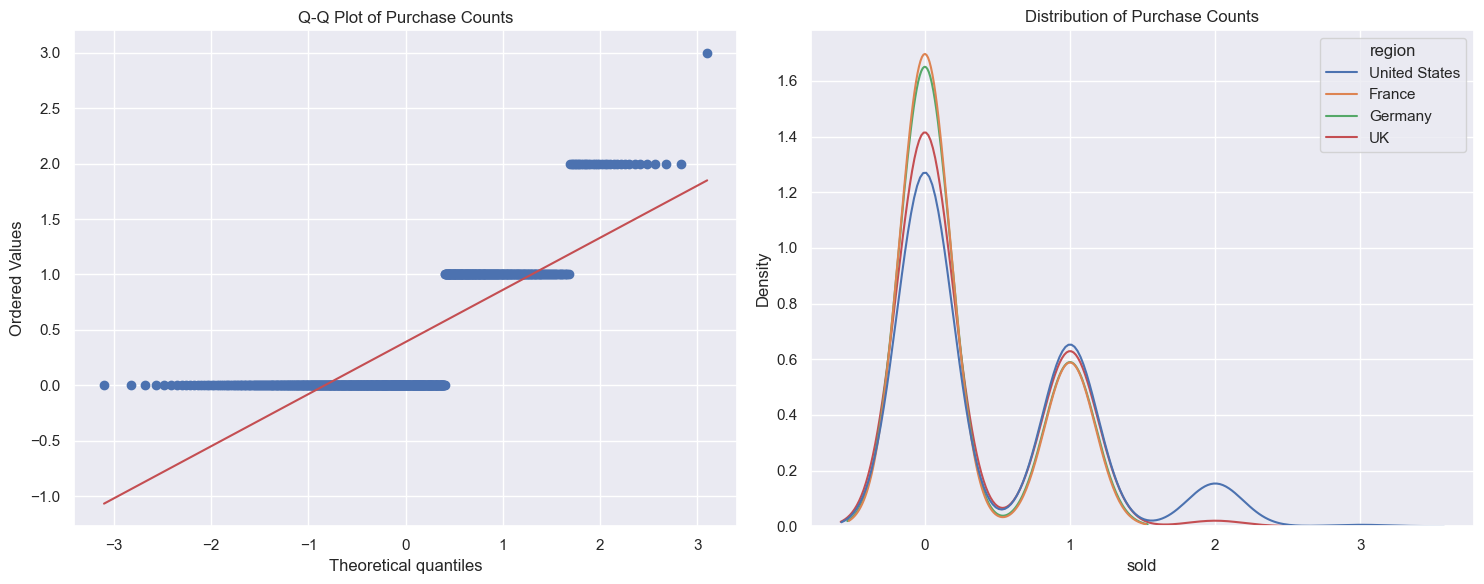

In [14]:
agg_df = aggregate_daily_purchases(df)
print(test_and_visualize_normality(agg_df))